# TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The TMDb movie dataset was chosen to perform data analysis and show results in plots.
The TMDb Movie database contains information about 10,000 movies, including user ratings, revenue, movie genre, year, etc.

**After completing the analysis, the following questions will be answered:**

<ul>
<li><a href="#Q1">Is there an increase in profits with over in the years?</a></li>
<li><a href="#Q2">What is the average run time for movies?</a></li>
<li><a href="#Q3">What is the average vote count for movies?</a></li>
<li><a href="#Q4">Does the increase in profits lead to an increase in the average rating?</a></li>
</ul>

 **Import the required packages**

In [1]:
# import numpy, pandas and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

In this section, TMDb movie data will be loaded, check for cleanliness,  and then clean the dataset for analysis.

**Load and read the TMDb movies dataset.**

In [2]:
# load the TMDb movies dataset 
df = pd.read_csv('tmdb-movies.csv')

**Print out a few lines of the TMDb movies dataset.**

In [3]:
# view first 5 rows of the TMDb movies dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**View dimensions of the TMDb movies dataset.**

In [4]:
# view the number of rows and columns of the TMDb movies dataset
df.shape

(10866, 21)

`There are 10866 rows and 21 columns.`

**View summary of information of the TMDb movies dataset.**

In [5]:
# view information of the TMDb movies dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

`The number of entries is 10866, there are 4 floats, 6 integers and 11 strings datatypes.`

`There is a problem with the release_date data type, but it can be overlooked.`

**View the Statistic data for numeric values.**

In [6]:
# View the count, mean, std, min, 25%, 50%, 75% and max
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


`View the count, mean, std, min, 25%, 50%, 75% and max for each numeric values.`

**View missing value count for each feature in the TMDb movies dataset.**

In [7]:
# view missing value in the TMDb movies dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

`There are missing values in imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies.`

**View number of duplicates in the TMDb movies dataset.**

In [8]:
# view number of duplicates in the TMDb movies dataset
df.duplicated().sum()

1

`There is one duplicate data.`

**View unique value in the TMDb movies dataset..**

In [9]:
# view nunique in the TMDb movies dataset
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

`There are many unique values ​​in each columns.`

**View the distribution of the TMDb movies dataset.**

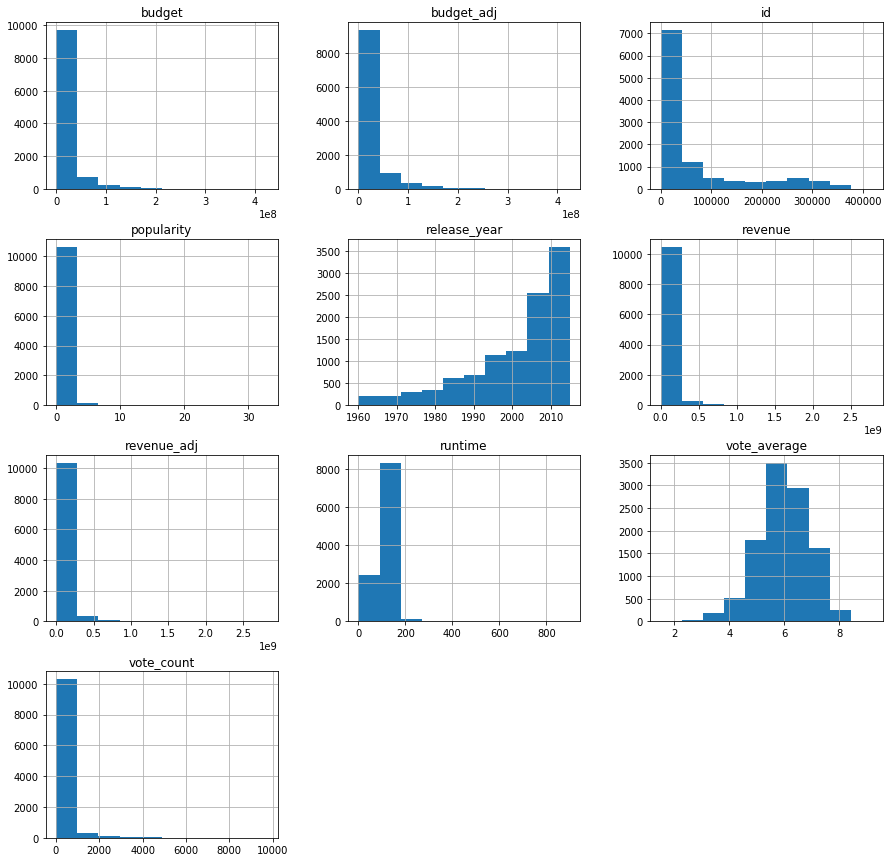

In [16]:
# View the distribution of the TMDb movies dataset
df.hist(figsize=(15,15));

`View histograms.`

After the TMDb movie data has been viewed and check for cleanliness, some problems with the data have been discovered, which must be addressed, including:
* Many columns that are not necessary for analysis and should be deleted.
* Several columns contain more than one value separated by a (|) sign, and some have a NaN or zero.

### Data Cleaning

After clearly understanding the TMDb movie data set, the data cleaning process will now begin.

**Dropping the unnecessary columns from the TMDb movies dataset.**

In [18]:
# drop columns from the TMDb movies dataset
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 
         'tagline', 'keywords', 'overview', 'production_companies',
         'release_date', 'budget_adj', 'revenue_adj'],
         axis=1, inplace=True)

# confirm changes
df.head(1)

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015


`Drop unnecessary columns for analysis from the TMDb movie dataset.`

**Check the zero values for each column**

In [21]:
# Check the zero values for each column
df.isin([0]).sum()

popularity           0
budget            5696
revenue           6016
original_title       0
runtime             31
genres               0
vote_count           0
vote_average         0
release_year         0
dtype: int64

`There are many zero values that are not useful to us in the analysis and therefore must be replaced by values that are null to remove.`

**Convert any zero value to an null value.**

In [22]:
#Convert any zero value to nan
df = df.replace(0, np.nan)

# confirm changes
df.isin([0]).sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

`All zero values have been replaced by null values.`

**View missing value count for each feature in the TMDb movies dataset.**

In [23]:
# view missing value in the TMDb movies dataset
df.isnull().sum()

popularity           0
budget            5696
revenue           6016
original_title       0
runtime             31
genres              23
vote_count           0
vote_average         0
release_year         0
dtype: int64

`View the missing value in the TMDb movie dataset after converting zero values to null values.`

**Drop rows with any null values in the TMDb movies dataset.**

In [24]:
# drop rows with any null values in the TMDb movies dataset
df.dropna(inplace=True)

# confirm changes
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

`Drop all the null values from TMDb movie data set.`

**Dropping the rows with duplicate values  in the TMDb movies dataset.**

In [25]:
# drop the duplicates in the TMDb movies dataset
df.drop_duplicates(inplace=True)

# confirm changes
df.duplicated().sum()

0

`Drop duplicate values s from TMDb movie data set.`

**Display the dimensions of the TMDb movie data set after cleaning the data.**

In [26]:
# view the number of rows and columns of the TMDb movies dataset
df.shape

(3854, 9)

`There are 3854 rows and 9 columns.`

<a id='eda'></a>
## Exploratory Data Analysis

After improving and cleaning up the data, we will create visualizations to answer the research questions that were asked in the introduction.

<a id='Q1'></a>
### Question 1: Is there an increase in profits with over in the years?
**First, profits must be calculated then convert datatype.**

In [46]:
#Calculate profits
df['profits'] = df['revenue'] - df['budget']

# convert profits frome float to integer
df.profits = df.profits.astype(int)

# confirm changes
df.head(1)

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profits
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810


`Profits were calculated by the following formula:
Profits = revenue - budget
Then, convert profits frome float to integer`

**Now profits will be calculated for each year.**

In [47]:
#View Profits for each year
df_profits = df.groupby('release_year')['profits'].sum()

# confirm changes
df_profits

release_year
1960      108198052
1961      299083188
1962      166879846
1963      115411882
1964      294678387
1965      399281854
1966       52468689
1967      636334637
1968      168271762
1969      206862989
1970      454070023
1971      336284710
1972      457235917
1973     1057686099
1974      650582027
1975      808207270
1976      629426536
1977     1743308485
1978     1005100089
1979      950330150
1980     1002065664
1981     1320251458
1982     1811756359
1983     1505073842
1984     1833438131
1985     1666899046
1986     1665354869
1987     2148546726
1988     2313076703
1989     3603940908
1990     3454904971
1991     3048121485
1992     3873046070
1993     4575828325
1994     4704384415
1995     5608098320
1996     4736626727
1997     6380241248
1998     5274145395
1999     6433209130
2000     6110774823
2001     8022044875
2002     9004589344
2003     9202155213
2004     9822506642
2005     9259452998
2006     8726299999
2007    11686103667
2008    11843373159
2009   

`Profits were calculated for each year.`

**View the profits for each years in the bar chart**

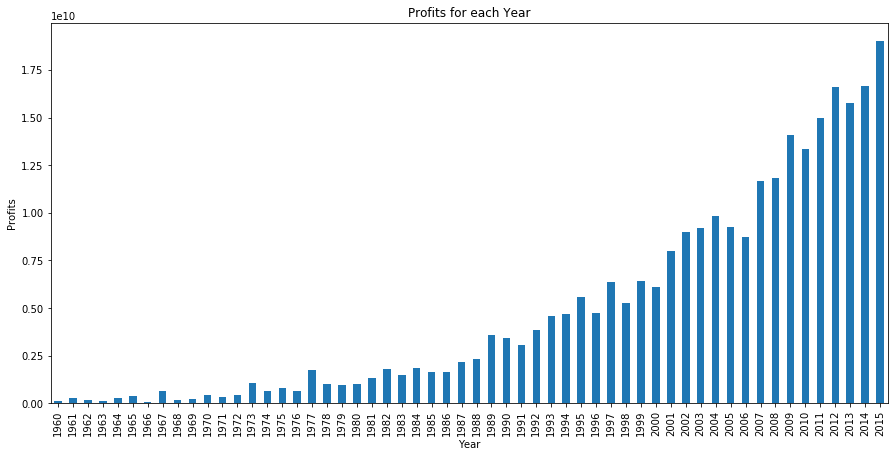

In [48]:
# plot the result in bar chart
df_profits.plot(kind='bar', figsize=(15,7))
plt.title('Profits for each Year')
plt.xlabel('Year')
plt.ylabel('Profits');

`Through the bar chart, it was noticed that there was an increase in profits during the passage of years.`

<a id='Q2'></a>
### Question 2: What is the average run time for movies?
**Calculate average run time.**

In [31]:
# calculate the average run time
df['runtime'].mean()

109.22029060716139

`The average run time is 109.22.`

**View the average run time in the histogram.**

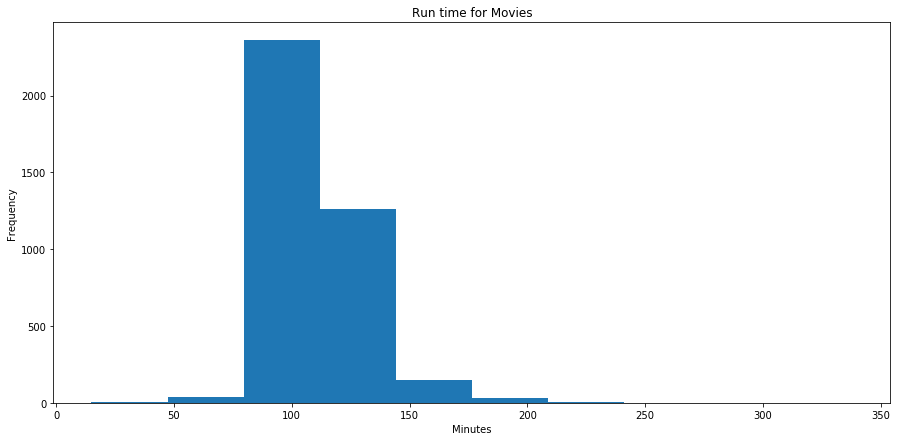

In [37]:
#plot the result in histogram
df['runtime'].plot(kind='hist', figsize=(15,7))
plt.title('Run time for Movies')
plt.xlabel('Minutes');

`Through the histogram, it is observed that the distribution time of the films run time is 100 to 110 minutes.`

<a id='Q3'></a>
### Question 3: What is the average vote count for movies?
**Calculate average vote count.**

In [38]:
# calculate the average vote count
df['vote_count'].mean()

527.7202906071614

`The average vote count is 527.72.`

**View the average vote count in the histogram.**

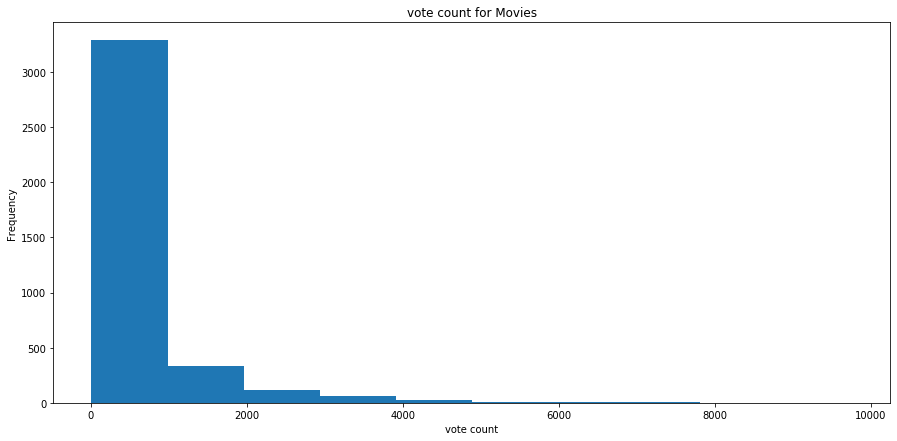

In [39]:
#plot the result in histogram
df['vote_count'].plot(kind='hist', figsize=(15,7))
plt.title('vote count for Movies')
plt.xlabel('vote count');

`Through the graph, it is observed that there is a skewed to right in the number of votes.`

<a id='Q4'></a>
### Question 4:  Does the increase in profits lead to an increase in the average rating?
**A scatter diagram should be drawn showing the vote average and profits.**

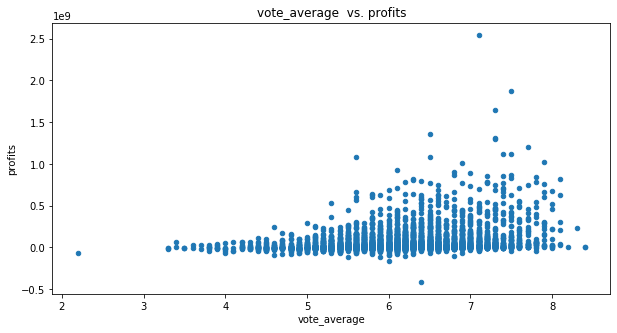

In [43]:
# plot the relationship in scatter
df.plot(kind='scatter', x='vote_average', y='profits', figsize=(10,5))
plt.title('vote_average  vs. profits')
plt.xlabel('vote_average')
plt.ylabel('profits');

`Through scatter, the relationship between average votes and profits is observed to be positive.
Increase in profits leads to an increase in the average rating.`

**View dimensions of the TMDb movies dataset.**

In [41]:
# view the number of rows and columns of the TMDb movies dataset
df.shape

(3854, 10)

`There are 3854 rows and 10 columns.`

<a id='conclusions'></a>
## Conclusions

After the TMDb movie data set was chosen to perform data analysis and show results in the plots, it was noticed that there were several problems with the data and they were solved as described previously.

After cleaning the data and solving all its problems, it was analyzed to answer all the questions presented in the introduction section.

Finally, the number of data has decreased, and we have 3,854 rows and 10 columns, and TMB Movie Data Collection has become completely clean.